In [1]:
%cd ..

/home/zaccharie/workspace/fastmri-reproducible-benchmark


In [2]:
%matplotlib nbagg
import glob

import h5py
import matplotlib.pyplot as plt
import numpy as np

from utils import crop_center

In [3]:
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['image.cmap'] = 'gray'

# Loading input data

In [4]:
val_path = '../singlecoil_val/'
filenames = glob.glob(val_path + '*')

In [5]:
def from_file_to_mask_and_kspace(filename):
    h5_obj = h5py.File(filename)
    image = h5_obj['reconstruction_esc'][()]
    kspace = h5_obj['kspace'][()]
    return image, kspace

In [6]:
file_0 = filenames[5]
images,  kspaces = from_file_to_mask_and_kspace(file_0)

In [7]:
slice_selected = 10
kspace = kspaces[slice_selected]
image = images[slice_selected]

In [8]:
kspace.shape

(640, 368)

In [9]:
image.shape

(320, 320)

# Visualizing input data

<IPython.core.display.Javascript object>


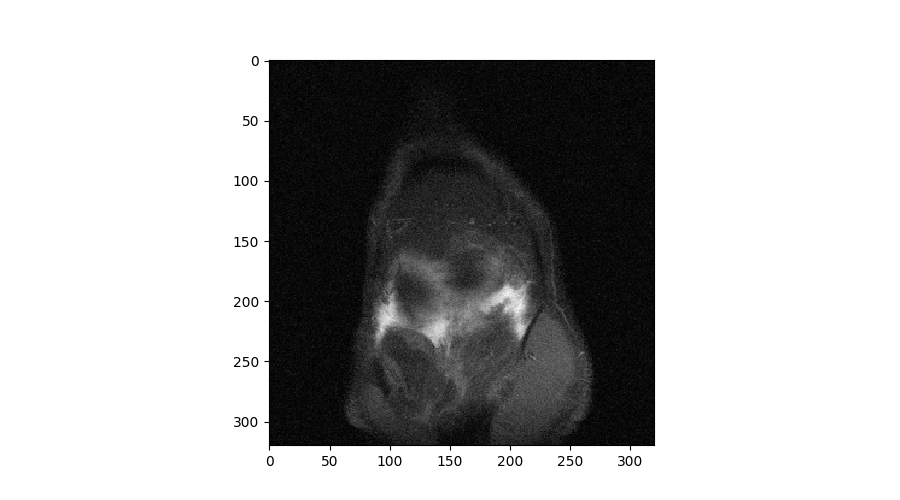

In [10]:
plt.figure()
plt.imshow(image)

In [11]:
np.mean(image)

2.4808269e-05

<IPython.core.display.Javascript object>


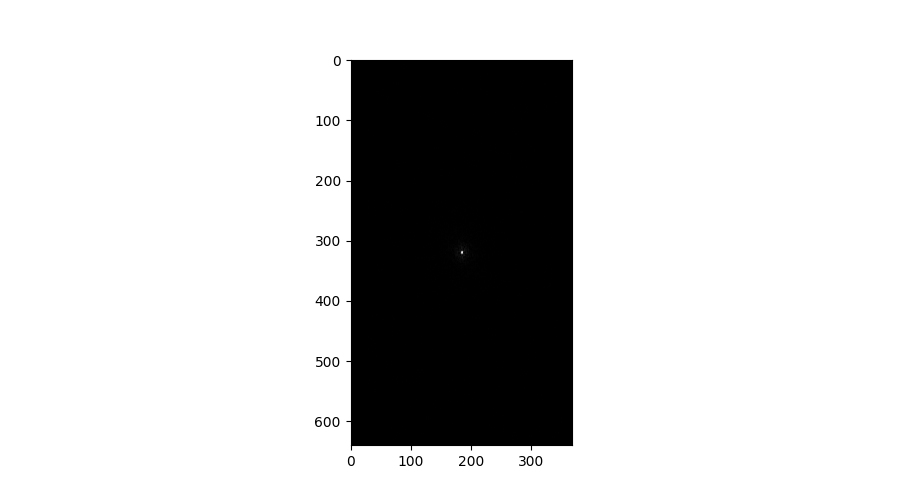

In [12]:
plt.figure()
plt.imshow(np.abs(kspace))

<IPython.core.display.Javascript object>


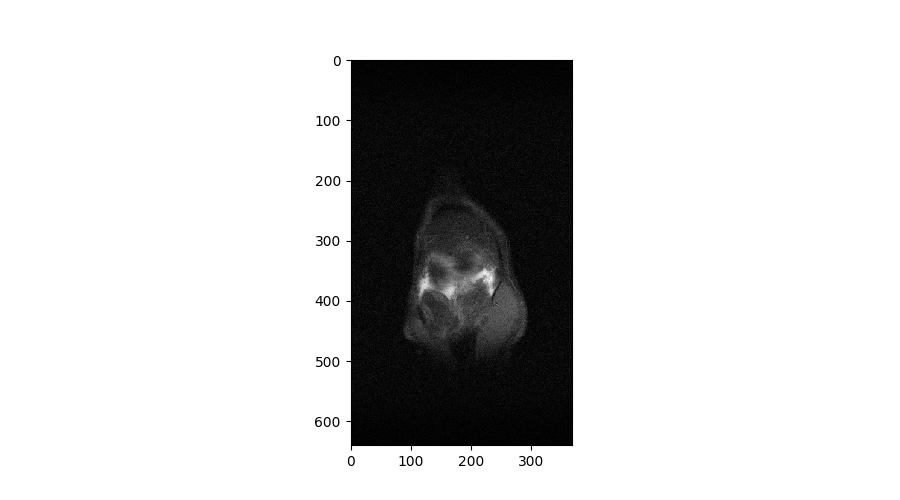

In [13]:
plt.figure()
plt.imshow(np.abs(np.fft.ifftshift(np.fft.ifft2(kspace))))

In [21]:
reco = np.abs(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(kspace, norm='ortho'))))
reco = crop_center(reco, 320)
print(np.mean(reco))

TypeError: ifftshift() got an unexpected keyword argument 'norm'

<IPython.core.display.Javascript object>


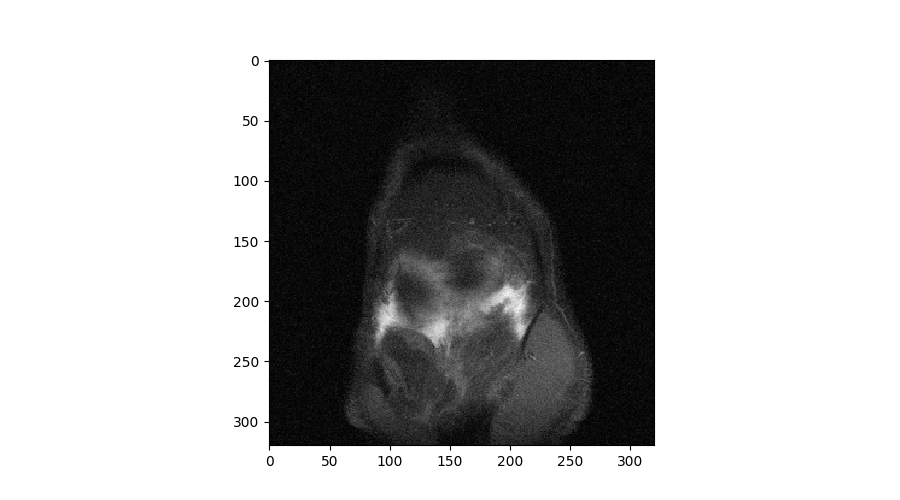

In [19]:
plt.figure()
plt.imshow(reco)

<IPython.core.display.Javascript object>


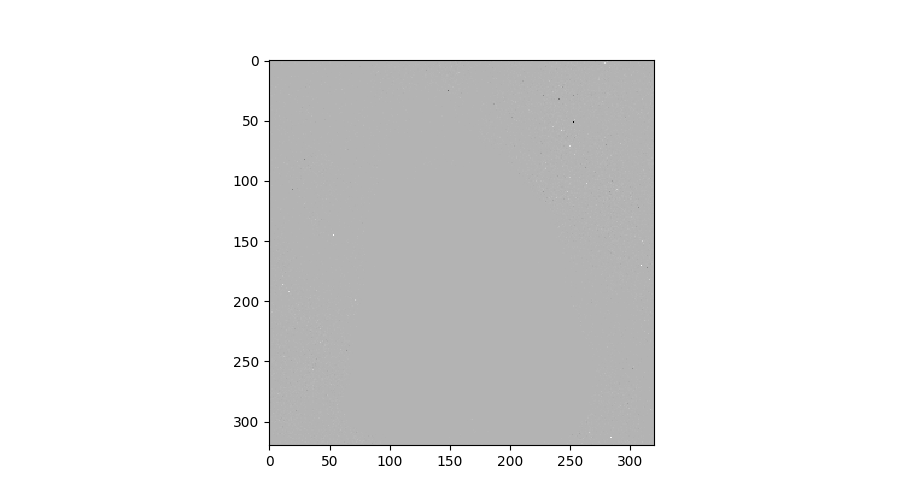

In [16]:
plt.figure()
plt.imshow(image / reco)

In [20]:
np.unique(image / reco)

array([0.99998057, 0.99999134, 0.99999282, ..., 1.00000785, 1.00000796,
       1.00000819])